In [1]:
#Yiming Ge
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')



A momentum strategy is a bet that past returns will predict future returns in the cross-section of assets, and is typically implemented by buying past winners and selling past losers.

However, the strong positive average returns and Sharpe ratios of momentum strategies are punctuated with occasional strong reversals, or “crashes.” They tend to occur in times of market stress, specifically when the market has fallen and when ex-ante measures of volatility are high. They also occur when contemporaneous market returns are high.

Using beta estimates based on daily returns they find that, following major market declines, betas for the past-loser decile rise above 3, and fall below 0.5 for past winners. Hence, when the market rebounds quickly, momentum strategies will crash because they have a conditionally large negative beta.

In this paper, they show that this results in a strong bias in estimated returns, and that a hedging strategy based on ex-ante betas does not exhibit the performance improvement noted in Grundy and Martin (2001), which is not implementable in real time.

To examine the hypothesis , whether the time variation in the momentum premium they document is related to time-varying exposure to volatility risk.

They use VIX-imputed variance-swap returns to show that the payoffs to momentum strategies have a strong negative exposure to innovations in marketvariance in bear markets (but not in “normal” markets). However, they also show that hedging out this time varying exposure to market-variance (by buying S&P variance swaps in bear markets) does not restore the profitability of momentum in bear markets.

Using the insights from the relationship between momentum payoffs and volatility, and the fact that the momentum strategy volatility is itself predictable and is distinct from the predictability in the mean return, they design an optimal dynamic momentum strategy, which at each point in time, is scaled up or down so as to maximize the unconditional Sharpe ratio of the dynamic portfolio.

In [2]:
#Question 2: Compare price series of DJTMNMO and MOM for the overlapping interval
DJTMNMO = pd.read_excel('/Users/yiming/Downloads/MomentumDJTMNMO.xlsx')
DJTMNMO.datetime = pd.to_datetime(DJTMNMO.datetime)
print(DJTMNMO)

       datetime  \
0    2010-04-30   
1    2010-05-01   
2    2010-05-02   
3    2010-05-03   
4    2010-05-04   
...         ...   
2852 2020-05-05   
2853 2020-05-06   
2854 2020-05-07   
2855 2020-05-08   
2856 2020-05-11   

      Dow Jones U.S. Thematic Market Neutral Momentum Total Return Index  \
0                                                957.32                    
1                                                957.32                    
2                                                957.32                    
3                                                972.82                    
4                                                959.97                    
...                                                 ...                    
2852                                            1363.20                    
2853                                            1372.54                    
2854                                            1373.43                    
2855       

In [3]:
MOM = yf.download('MOM', start='2010-04-30',end='2020-05-11')
MOM['40 times magnification'] = MOM['Adj Close'] * 40
print(MOM.head())

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close  Volume  \
Date                                                                        
2011-09-07  25.160000  25.660000  24.950001  25.100000  25.100000   13400   
2011-09-08  25.350000  25.350000  25.090000  25.090000  25.090000    7200   
2011-09-09  24.940001  25.020000  24.780001  24.840000  24.840000    5830   
2011-09-12  24.950001  24.950001  24.850000  24.850000  24.850000   16800   
2011-09-13  25.150000  25.150000  24.940001  25.059999  25.059999    8300   

            40 times magnification  
Date                                
2011-09-07             1004.000015  
2011-09-08             1003.600006  
2011-09-09              993.600006  
2011-09-12              994.000015  
2011-09-13             1002.399979  


In [4]:
print(MOM.tail())

                 Open       High        Low      Close  Adj Close  Volume  \
Date                                                                        
2020-05-04  28.758900  28.799601  28.615801  28.639999  28.639999    2740   
2020-05-05  28.668400  29.410000  28.632000  29.392700  29.392700    3411   
2020-05-06  29.195900  29.195900  29.174999  29.174999  29.174999     626   
2020-05-07  29.200001  29.318501  28.783501  29.318501  29.318501    5460   
2020-05-08  29.309999  29.439899  29.200100  29.309099  29.309099    4360   

            40 times magnification  
Date                                
2020-05-04             1145.599976  
2020-05-05             1175.708008  
2020-05-06             1166.999969  
2020-05-07             1172.740021  
2020-05-08             1172.363968  


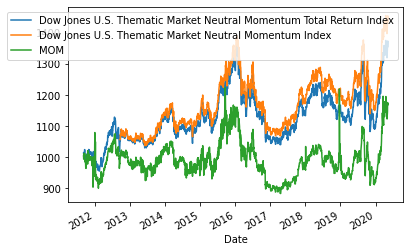

In [5]:
#based on the time window that MOM start and end
mask = (DJTMNMO['datetime'] > '2011-09-07') & (DJTMNMO['datetime'] <= '2020-05-08')
DJTMNMO_OVERLAP = DJTMNMO.loc[mask]
DJTMNMO_OVERLAP.plot(x='datetime')
MOM['40 times magnification'].plot(label = 'MOM')
plt.legend()

In [6]:
#Question 3: Try to replicate the price series of DJTMNMO using MTUM and SPY returns.

In [7]:
#calculate the spy return
SPY = yf.download('SPY', start='2013-04-18',end='2020-05-08')

[*********************100%***********************]  1 of 1 completed


In [8]:
SPY['daily_return'] = (SPY['Adj Close']/ SPY['Adj Close'].shift(1)) -1
SPY['cum_returns'] = (SPY['daily_return'] + 1).cumprod()
SPY

,Open,High,Low,Close,Adj Close,Volume,daily_return,cum_returns
Date,,,,,,,,
2013-04-18,155.369995,155.410004,153.550003,154.139999,131.983978,167583200,NaN,NaN
2013-04-19,154.500000,155.550003,154.119995,155.479996,133.131348,149687600,0.008693,1.008693
2013-04-22,155.779999,156.539993,154.750000,156.169998,133.722229,106553500,0.004438,1.013170
2013-04-23,156.949997,157.929993,156.169998,157.779999,135.100739,166141300,0.010309,1.023615
2013-04-24,157.830002,158.300003,157.539993,157.880005,135.186386,96781200,0.000634,1.024264
...,...,...,...,...,...,...,...,...
2020-05-01,285.309998,290.660004,281.519989,282.790009,278.326569,125180000,-0.026474,2.108791
2020-05-04,280.739990,283.899994,279.130005,283.570007,279.094299,80873200,0.002758,2.114607
2020-05-05,286.640015,289.250000,283.709991,286.190002,281.672913,79569900,0.009239,2.134145


In [9]:
#calculate the MTUM return

In [10]:
MTUM = yf.download('MTUM', start='2013-04-18',end='2020-05-08')
MTUM['daily_return'] = (MTUM['Adj Close']/ MTUM['Adj Close'].shift(1)) -1
MTUM['cum_returns'] = (MTUM['daily_return'] + 1).cumprod()
MTUM

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,daily_return,cum_returns
Date,,,,,,,,
2013-04-18,50.919998,50.919998,50.919998,50.919998,46.174778,400,NaN,NaN
2013-04-19,50.919998,50.919998,50.919998,50.919998,46.174778,0,0.000000,1.000000
2013-04-22,50.919998,50.919998,50.919998,50.919998,46.174778,0,0.000000,1.000000
2013-04-23,52.220001,52.220001,52.220001,52.220001,47.353630,600,0.025530,1.025530
2013-04-24,51.700001,51.700001,51.560001,51.560001,46.755150,1100,-0.012639,1.012569
...,...,...,...,...,...,...,...,...
2020-05-01,116.690002,117.400002,115.410004,116.029999,115.219452,1656900,-0.024466,2.495290
2020-05-04,115.510002,117.639999,115.510002,117.589996,116.768547,861200,0.013445,2.528838
2020-05-05,118.680000,120.620003,118.510002,119.449997,118.615555,749700,0.015818,2.568839


In [11]:
#calculate the DJTMNMO return
mask = (DJTMNMO['datetime'] > '2013-04-17') & (DJTMNMO['datetime'] <= '2020-05-08')
DJTMNMO_1 = DJTMNMO.loc[mask]
DJTMNMO_1['daily_return'] = (DJTMNMO_1['Dow Jones U.S. Thematic Market Neutral Momentum Index']/DJTMNMO_1['Dow Jones U.S. Thematic Market Neutral Momentum Index'].shift(1))-1
DJTMNMO_1['cum_returns'] = (DJTMNMO_1['daily_return'] + 1).cumprod()
DJTMNMO_1

,datetime,Dow Jones U.S. Thematic Market Neutral Momentum Total Return Index,Dow Jones U.S. Thematic Market Neutral Momentum Index,daily_return,cum_returns
1078,2013-04-18,1053.16,1059.91,NaN,NaN
1079,2013-04-19,1063.54,1070.39,0.009888,1.009888
1080,2013-04-22,1065.90,1072.72,0.002177,1.012086
1081,2013-04-23,1070.00,1076.85,0.003850,1.015982
1082,2013-04-24,1064.72,1071.56,-0.004912,1.010991
...,...,...,...,...,...
2851,2020-05-04,1347.57,1426.59,0.007180,1.345954
2852,2020-05-05,1363.20,1443.13,0.011594,1.361559
2853,2020-05-06,1372.54,1452.91,0.006777,1.370786
2854,2020-05-07,1373.43,1454.12,0.000833,1.371928


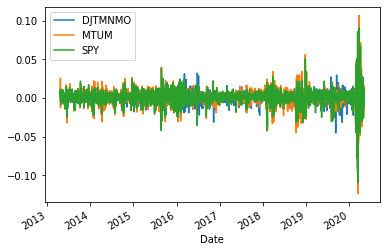

In [12]:
#visualization 
DJTMNMO_1.plot(x='datetime',y='daily_return',label = 'DJTMNMO')
MTUM['daily_return'].plot(label = 'MTUM')
SPY['daily_return'].plot(label = 'SPY')
plt.legend()

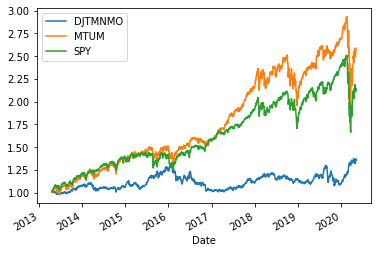

In [13]:
DJTMNMO_1.plot(x='datetime',y='cum_returns',label = 'DJTMNMO')
MTUM['cum_returns'].plot(label = 'MTUM')
SPY['cum_returns'].plot(label = 'SPY')
plt.legend()

In [14]:
#From the visulization I do not think the price series of DJTMNMO index have strong relation with MTUM and SPY returns

In [22]:
#Question 4: Using insights/ideas from the paper, try to come up with a quantitative strategy which trades momentum factor, while being market neutral (hedged by SPY (ETF). The list of factors to consider VIX, relalized market volatilty, seasonality etc.
#For this question, I would like use LSTM machine learning with different features to train the model
#If the model with volatility features do improve the model prediction accuracy
#I could say these indicators are efficiency
#In addition, I will check the feature importance
#if they have high feature importance which means they do affect the models 

In [23]:
import math
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from numpy import cumsum, log, polyfit, sqrt, std, subtract

In [31]:
#I use ^GSPC which is s&p500 index instead of the SPY ETF
# I choose the currency pairs because FX data are better than stock data to do machine learning
data = yf.download(" ^GSPC EURUSD=X ", start="2010-01-01", end="2021-01-01")

[*********************100%***********************]  2 of 2 completed


In [32]:
# extract data and drop Null
data_EURUSD = (data['Adj Close']['EURUSD=X']).fillna(1).reset_index()
data_SP500 = (data['Adj Close']['^GSPC']/1000).fillna(1).reset_index()
data_date_list = data.index.tolist()#date


In [33]:
#build the new data frame for calculation

df = pd.DataFrame( columns= ['Date','EURUSD=X','S&P','STD','Vol_global','Vol_local',\
                             'return','clusters','Price_MA','Primary risk',\
                             'FD','Hurst','Energy','Correlation','STD_short','Price_LB',\
                             'Price_UB','Price_LB_Price_UB_Distance','Distance_MA',\
                             'STD_c','Vol_global_c','Vol_local_c',\
                             'return_c','clusters_c','Price_MA_c','Primary risk_c',\
                             'FD_c','Hurst_c','Energy_c','Correlation_c','STD_short_c',\
                             'Price_LB_c','Price_UB_c','Price_LB_Price_UB_Distance_c',\
                             'Distance_MA_c'])
df['Date'] = data_date_list
df['EURUSD=X'] = data_EURUSD['EURUSD=X']
df['S&P'] = data_SP500['^GSPC']

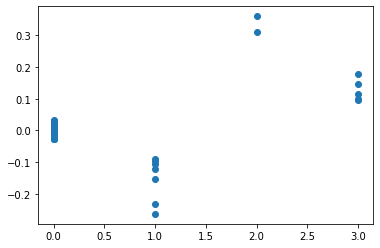

In [34]:
#calculate one day return and kmean cluster
df['return'] = (df['EURUSD=X'] - df['EURUSD=X'].shift(1)) / df['EURUSD=X'].shift(1)
df['return'] = df['return'].fillna(0)
X = df['return'].values.reshape(-1,1)
kmeans = KMeans(n_clusters=4).fit(X) #get kmeans
y_kmeans = kmeans.predict(X)
df['clusters'] = y_kmeans
centers = kmeans.cluster_centers_
plt.scatter(x=df['clusters'], y=df['return'])
plt.show()
centers_value = centers.tolist()

In [35]:
#Find the best short term lag based on returns (lag_period)

compared_mean_list =[]
lag_period_list = list(range(20,30,1)) #set lag_period

for lag_period in lag_period_list:
    clusters_list = list(df['clusters'].values)
    all_features_df = [[] for _ in range(lag_period+1)]#make empty list
    print(str(lag_period) + 'days lag period')


    #bulid the feature matrix using for loop
    for i in range(len(clusters_list)):
        if i >= lag_period - 1 and i < len(clusters_list) - 1:
            for n in range(0,lag_period+1):
                if n == 0:
                    all_features_df[n].append(clusters_list[i+1])
                    #y->response 
                else:
                    all_features_df[n].append(clusters_list[i - lag_period + n])
                    #X->features
    
    features_df = ''
    response_df = ''
    index = 0
    for i in range(len(all_features_df)):
        if index == 0:
            response_df = pd.DataFrame(all_features_df[i])
        elif index == 1:
            features_df = pd.DataFrame(all_features_df[i])
        else:
            tempDF = pd.DataFrame(all_features_df[i])
            features_df = pd.concat([features_df, tempDF], axis=1)
        index += 1
    
    
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = \
        train_test_split(features_df, response_df, test_size=0.33, random_state=42)
    
    
    
    ### Support Vector Machine Classification ###
    from sklearn.svm import SVC
    from sklearn.metrics import f1_score
    #instantiate classifier object and fit to training data
    clf = SVC(kernel="linear", C=0.5)
    clf.fit(X_train, y_train.values.ravel())
    
    # predict on test set and score the predictions against y_test
    y_pred = clf.predict(X_test)
    f1_svm = f1_score(y_test, y_pred,average = 'weighted') 
    print('f1 score (SVM) is = ' + str(f1_svm))
    
    
    ### SVM with Gaussian Kernel Classification ###
    # instantiate classifier object and fit to training data
    clf = SVC(gamma=2, C=1)
    clf.fit(X_train, y_train.values.ravel())
    
    # predict on test set and score the predictions against y_test
    y_pred = clf.predict(X_test)
    f1_svmk = f1_score(y_test, y_pred,average = 'weighted') 
    print('f1 score (SVM with Kernel) is = ' + str(f1_svmk))
    
    ### Decision Tree Classification ###
    # import modules
    from sklearn.tree import DecisionTreeClassifier
    
    #instantiate classifier object and fit to training data
    clf = DecisionTreeClassifier(max_depth=4, random_state=42)
    clf.fit(X_train, y_train)
    
    # predict on test set and score the predictions against y_test
    y_pred = clf.predict(X_test)
    f1_dt = f1_score(y_test, y_pred,average = 'weighted') 
    print('f1 score (Decision Tree) is = ' + str(f1_dt))
    
    
    ### Random Forest Classification ###
    # import modules
    from sklearn.ensemble import RandomForestClassifier
    
    #instantiate classifier object and fit to training data
    clf = RandomForestClassifier(max_depth=4, n_estimators=4, 
                                 max_features='sqrt', random_state=42)
    clf.fit(X_train, y_train.values.ravel())
    
    # predict on test set and score the predictions against y_test
    y_pred = clf.predict(X_test)
    f1_rf = f1_score(y_test, y_pred,average = 'weighted') 
    print('f1 score (Random Forest) is = ' + str(f1_rf))
    
    #print the average of four f1 scores
    f1_scores = [f1_svm,f1_svmk,f1_dt,f1_rf]
    mean = np.mean(f1_scores)
    print('average f1 scores with these four classifications:'+str(mean))
    compared_mean_list.append(mean) #add to the empty list to make the comparision later        
    print()
#pick the best lag period
print('Best Lag Period:')
best_lag = lag_period_list[compared_mean_list.index(max(compared_mean_list))]
print(best_lag)

20days lag period
f1 score (SVM) is = 0.9920368326919582
f1 score (SVM with Kernel) is = 0.9920368326919582
f1 score (Decision Tree) is = 0.9920368326919582
f1 score (Random Forest) is = 0.9920368326919582
average f1 scores with these four classifications:0.9920368326919582

21days lag period
f1 score (SVM) is = 0.9888555437477862
f1 score (SVM with Kernel) is = 0.9893832147956771
f1 score (Decision Tree) is = 0.9893832147956771
f1 score (Random Forest) is = 0.9888555437477862
average f1 scores with these four classifications:0.9891193792717317

22days lag period
f1 score (SVM) is = 0.9904459031697442
f1 score (SVM with Kernel) is = 0.9928824681856891
f1 score (Decision Tree) is = 0.9928824681856891
f1 score (Random Forest) is = 0.9928824681856891
average f1 scores with these four classifications:0.9922733269317029

23days lag period
f1 score (SVM) is = 0.9936215578641746
f1 score (SVM with Kernel) is = 0.9955699290780142
f1 score (Decision Tree) is = 0.9941514893617021
f1 score (Rando

In [36]:
#Find the best long term lag

range_period_list = list(range(150,170,10)) 

regressor_list = []
for range_period in range_period_list:
    # calculate the std within range 
    df['STD'] = df['EURUSD=X'].rolling(range_period).std(ddof=0)

    # get the std_max to calculate the vol_global
    df_std_max = df['STD'].max()
    # calculate the vol_global
    df['Vol_global'] = df['STD'] / df_std_max

    # calculate the vol_local
    df['Vol_local'] = df['STD'] / df['STD'].rolling(10).mean() / 3

    # calculate the primary risk using np.ceil (round up)
    df['Primary risk'] = (1 / df['Vol_global']).apply(np.ceil) / 10

    # calculate the correlation
    df['Correlation'] = 0.5 * (df['EURUSD=X'].rolling(range_period).corr(df['S&P']) + 1)

    # calculate fd and hurst
    FDs = list()
    Hurst = list()
    for i, data_row in df.iterrows():
        if i < len(df) + 1 - range_period:
            spy_close = df[i:i + range_period - 1]
            spy_close = spy_close[['EURUSD=X']].copy()
            lag1, lag2 = 2, 20  # lag chosen 2 , 20
            lags = range(lag1, lag2)

            # Fractal Dimension calculation
            tau = [sqrt(std(subtract(spy_close[lag:], spy_close[:-lag]))) for lag in lags]
            m = polyfit(log(lags), log(tau), 1)
            hurst = m[0] * 2
            fractal = 2 - hurst[0]
            FDs.append(fractal)
            Hurst.append(hurst)
        else:
            break
    df['FD'][range_period - 1:len(df) + 1] = FDs
    df['Hurst'][range_period - 1:len(df) + 1] = Hurst

    # Linear regression to find coeff for calculating the energy
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression

    Vols = df['Vol_global'][range_period - 1:len(df) + 1]
    FD = df['FD'][range_period - 1:len(df) + 1]
    X = Vols.values.reshape(-1, 1)
    y = FD.values.reshape(-1, 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Linear Regression model built on train data
    regressor = LinearRegression()

    # training the algorithm
    regressor.fit(X_train, y_train)

    # Calculating the coeff B of Fractal Dim
    c = regressor.intercept_
    B = 1 / c

    # Calculating the coeff A of Vol
    m = regressor.coef_
    A = m.item() * B
  

    # calculate the Energy
    df['Energy'] = A * df['Vol_global'] + B * df['FD']
    energy_list = list(df['Energy'].values)
    energy_list = energy_list[range_period-1:]
    response_list = np.array(range(len(energy_list)))
    regressor.fit(np.array(energy_list).reshape(-1,1),response_list.reshape(-1,1))
    regressor_list.append(regressor)


# compare which day can return the min of absolute_value[A*vol+B*FD]-1 by assuming t = 1
compared_result_list = []
for i in range(len(regressor_list)):
    t = 1
    coe = regressor_list[i].coef_[0]
    intercept = regressor_list[i].intercept_
    compared_result_list.append(abs(coe*t+intercept) - 1)
# print the day hs smallest value 
best_range = range_period_list[compared_result_list.index(min(compared_result_list))]
print('best range_period based on energy:')
print(best_range)

best range_period based on energy:
160


In [37]:
# Define The Feature Matrix including different volatility indicators, upper bound, lower bound, moving average, correlation etc.
data_EURUSD = (data['Adj Close']['EURUSD=X']).fillna(data['Adj Close']['EURUSD=X'].mean()).reset_index()
data_SP500 = (data['Adj Close']['^GSPC']/1000).fillna(data['Adj Close']['^GSPC'].mean()/1000).reset_index()

data_date_list = data.index.tolist()#date

df = pd.DataFrame( columns= ['Date','EURUSD=X','S&P','STD','Vol_global','Vol_local',\
                             'return','Price_MA','Primary risk',\
                             'FD','Energy','Correlation','STD_short','Price_LB',\
                             'Price_UB','Price_LB_Price_UB_Distance','Distance_MA'])
df['Date'] = data_date_list
df['EURUSD=X'] = data_EURUSD['EURUSD=X']
df['S&P'] = data_SP500['^GSPC']
#calculate the std within range 200
df['STD'] = df['EURUSD=X'].rolling(range_period).std(ddof=0)
df['return'] = (df['EURUSD=X'] - df['EURUSD=X'].shift(1)) / df['EURUSD=X'].shift(1)
df['return'] = df['return'].fillna(0)

#get the std_max to calculate the vol_global
df_std_max = df['STD'].max()
#calculate the vol_global
df['Vol_global'] = df['STD'] / df_std_max


#calculate the vol_local
df['Vol_local'] = df['STD'] / df['STD'].rolling(10).mean() / 3


#calculate the primary risk using np.ceil (round up)
df['Primary risk'] = (1/ df['Vol_global']).apply(np.ceil) / 10


#calculate the correlation
df['Correlation'] = 0.5*(df['EURUSD=X'].rolling(range_period).corr(df['S&P'])+1)


#calculate fd and hurst
FDs = list()
Hurst = list()
for i, data_row in df.iterrows():
    if i < len(df)+1-range_period:
        spy_close = df[i:i+range_period-1]
        spy_close = spy_close[['EURUSD=X']].copy()
        lag1, lag2 = 2, 20 # lag chosen 2 , 20
        lags = range(lag1, lag2)
            
        #Fractal Dimension calculation
        tau = [sqrt(std(subtract(spy_close[lag:], spy_close[:-lag]))) for lag in lags]
        m = polyfit(log(lags), log(tau), 1)
        hurst = m[0]*2
        fractal = 2-hurst[0]
        FDs.append(fractal)
        Hurst.append(hurst)
    else:
        break
df['FD'][range_period-1:len(df)+1] = FDs



from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
Vols = df['Vol_global'][range_period-1:len(df)+1]
FD = df['FD'][range_period-1:len(df)+1]
X = Vols.values.reshape(-1,1)
y = FD.values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Linear Regression model built on train data
regressor = LinearRegression() 

#training the algorithm
regressor.fit(X_train, y_train) 

#Calculating the coeff B of Fractal Dim
c = regressor.intercept_
B =1/c

#Calculating the coeff A of Vol
m = regressor.coef_
A = m.item()*B
#calculate the Energy
df['Energy'] = A*df['Vol_global'] + B*df['FD']
df['Price_MA'] = df['EURUSD=X'].rolling(best_lag).mean()
df['STD_short'] = df['EURUSD=X'].rolling(best_lag).std(ddof=0)
df['Price_LB'] = df['Price_MA'] - 2 * df['STD_short']
df['Price_UB'] = df['Price_MA'] + 2.02 * df['STD_short']
df['Price_LB_Price_UB_Distance'] = df['Price_UB']- df['Price_LB']
df['Distance_MA'] = df['Price_LB_Price_UB_Distance'].rolling(best_lag).mean()

In [38]:
#select small amount of data due to equipment limitations
mask = (df['Date'] > '2020-02-20') & (df['Date'] <= '2020-07-01')
df = df.loc[mask]
df

,Date,EURUSD=X,S&P,STD,Vol_global,Vol_local,return,Price_MA,Primary risk,FD,Energy,Correlation,STD_short,Price_LB,Price_UB,Price_LB_Price_UB_Distance,Distance_MA
2645,2020-02-21,1.078800,3.33775,0.039101,0.511684,0.338661,-0.002044,1.099042,0.2,1.50766,0.777721,0.425491,0.011054,1.076933,1.121372,0.044438,0.025591
2646,2020-02-24,1.083905,3.22589,0.039220,0.513234,0.338592,0.004732,1.098000,0.2,1.50735,0.777279,0.423640,0.011056,1.075887,1.120334,0.044447,0.026544
2647,2020-02-25,1.084920,3.12821,0.039331,0.514686,0.338441,0.000936,1.096911,0.2,1.5072,0.776945,0.422977,0.010787,1.075337,1.118700,0.043363,0.027493
2648,2020-02-26,1.088200,3.11639,0.039422,0.515886,0.338122,0.003023,1.095991,0.2,1.5071,0.776682,0.422414,0.010385,1.075222,1.116968,0.041746,0.028418
2649,2020-02-27,1.088589,2.97876,0.039511,0.517041,0.337795,0.000358,1.095246,0.2,1.50715,0.776516,0.423415,0.010137,1.074971,1.115723,0.040752,0.029309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2734,2020-06-25,1.125087,3.08376,0.015828,0.207121,0.343617,-0.005434,1.116485,0.5,1.59222,0.878105,0.630406,0.015339,1.085807,1.147469,0.061662,0.051492
2735,2020-06-26,1.122208,3.00905,0.015897,0.208026,0.342852,-0.002559,1.117581,0.5,1.59181,0.877712,0.630313,0.014594,1.088393,1.147060,0.058667,0.052822
2736,2020-06-29,1.122586,3.05324,0.015967,0.208948,0.342116,0.000337,1.118645,0.5,1.59237,0.877878,0.630440,0.013812,1.091022,1.146545,0.055523,0.054039
2737,2020-06-30,1.124720,3.10029,0.016051,0.210050,0.341897,0.001901,1.119589,0.5,1.59231,0.877655,0.630978,0.013282,1.093026,1.146418,0.053393,0.055137


In [39]:
#check featrue importance in three different way
df.Date = pd.to_datetime(df.Date)
df = df.set_index('Date')
df.shape
X = df[['S&P','STD','Vol_global','Vol_local',\
        'Price_MA','Primary risk',\
        'FD','Energy','Correlation','STD_short','Price_LB',\
        'Price_UB','Price_LB_Price_UB_Distance','Distance_MA']]
y = df['EURUSD=X']   

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

Feature 0: 8.369977
Feature 1: 8.425858
Feature 2: 8.425858
Feature 3: 14.168455
Feature 4: 16.744720
Feature 5: 9.981950
Feature 6: 3.373415
Feature 7: 0.174261
Feature 8: 4.044011
Feature 9: 6.656517
Feature 10: 0.182926
Feature 11: 11.970331
Feature 12: 6.656517
Feature 13: 14.031509


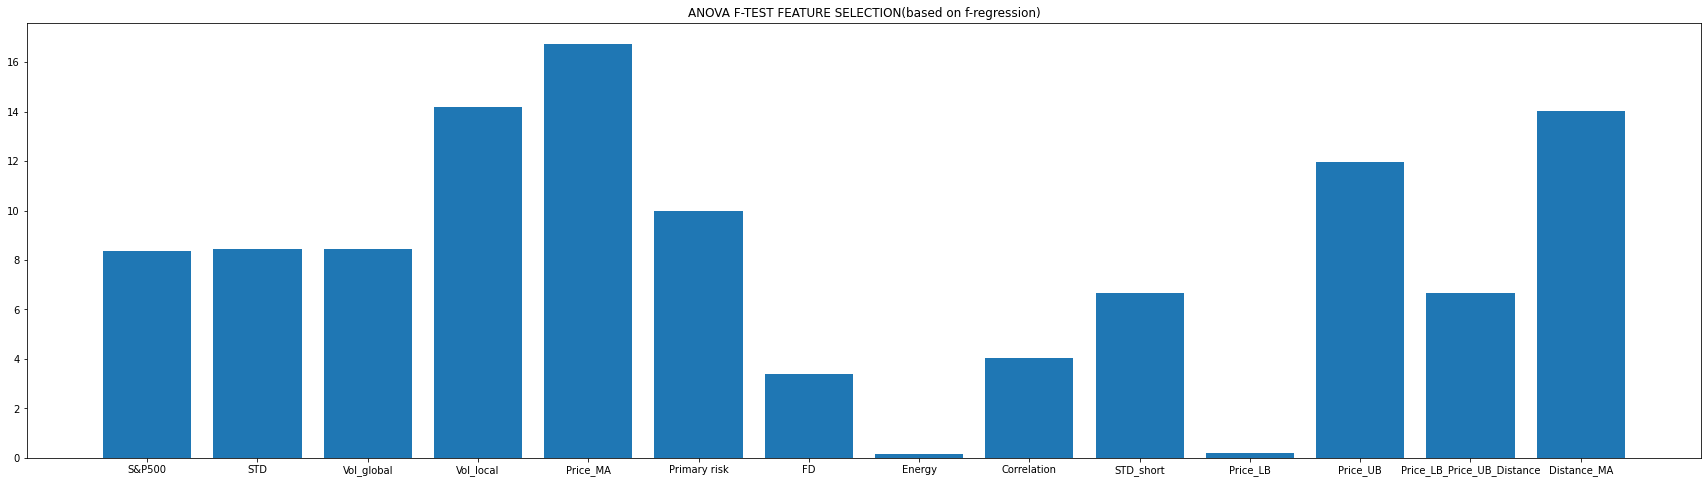

In [40]:
#######ANOVA F-TEST FEATURE SELECTION###########
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
from sklearn.feature_selection import SelectKBest
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.figure(figsize = (30,8))
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.xticks( [0,1,2,3,4,5,6,7,8,9,10,11,12,13], ('S&P500','STD','Vol_global','Vol_local',\
                                                   'Price_MA','Primary risk',\
                                                   'FD','Energy','Correlation','STD_short','Price_LB',\
                                                   'Price_UB','Price_LB_Price_UB_Distance','Distance_MA') )
pyplot.title('ANOVA F-TEST FEATURE SELECTION(based on f-regression)')
pyplot.show()

Feature 0: 0.303294
Feature 1: 0.383558
Feature 2: 0.383558
Feature 3: 0.404484
Feature 4: 0.196400
Feature 5: 0.449061
Feature 6: 0.419226
Feature 7: 0.421674
Feature 8: 0.463028
Feature 9: 0.331474
Feature 10: 0.303394
Feature 11: 0.382584
Feature 12: 0.331474
Feature 13: 0.336763


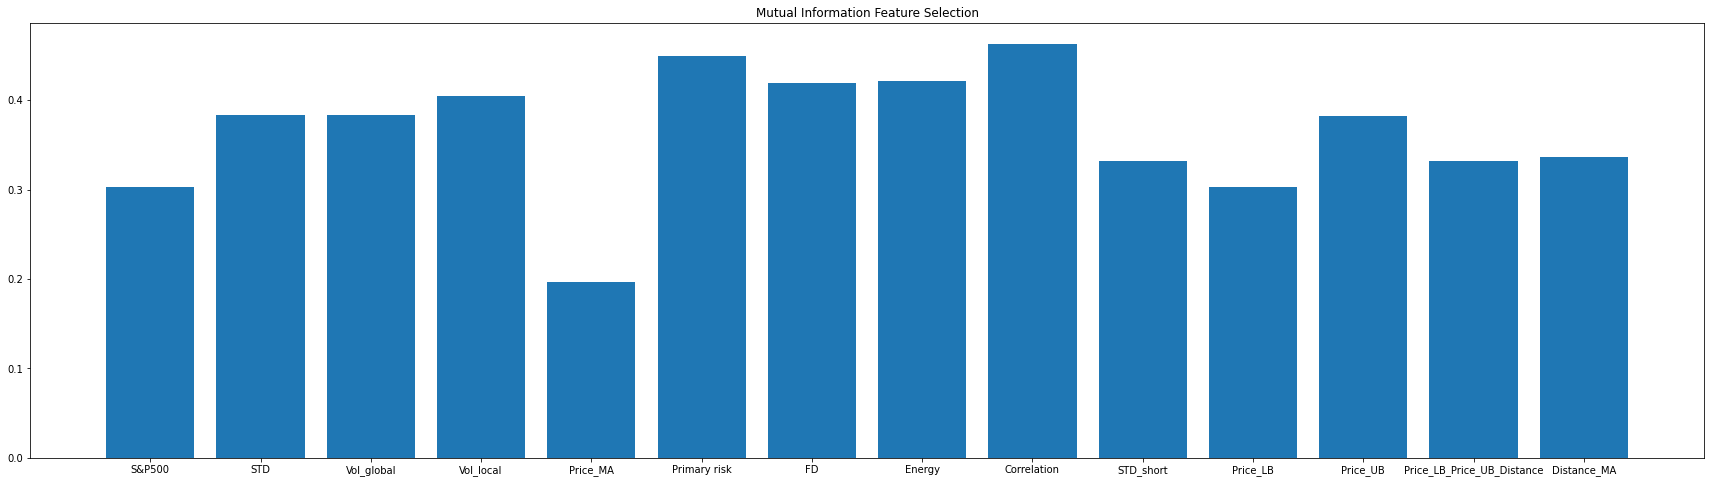

In [41]:
##############Mutual Information Feature Selectio##########
# example of mutual information feature selection for numerical input data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from matplotlib import pyplot
 
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.figure(figsize = (30,8))
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.xticks( [0,1,2,3,4,5,6,7,8,9,10,11,12,13], ('S&P500','STD','Vol_global','Vol_local',\
                                                   'Price_MA','Primary risk',\
                                                   'FD','Energy','Correlation','STD_short','Price_LB',\
                                                   'Price_UB','Price_LB_Price_UB_Distance','Distance_MA') )
pyplot.title('Mutual Information Feature Selection')
pyplot.show()


In [ ]:
####Vanilla LSTM####
import tensorflow as tf
from numpy import array
from numpy import hstack
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
train,test = df['EURUSD=X'][:53],df['EURUSD=X'][53:]
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
 
raw_seq = train
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
n_features = 1
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X_train, y_train, epochs=200, verbose=0)

X_test,y_test = split_sequence(test,n_steps)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))
y_pred = model.predict(X_test)


plt.figure(figsize = (20,5))
plt.ylabel("EURUSD=X")
plt.plot(test.index[3:],y_test,label = 'reality')
plt.plot(test.index[3:],y_pred,color = 'r',label = 'prediction')
plt.title('Vanilla LSTM')
plt.legend()
plt.show()

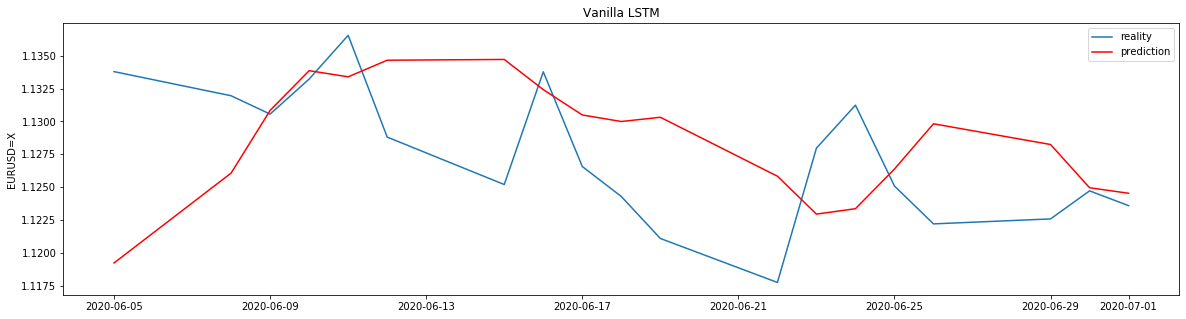

In [ ]:
#####Multiple series input#####
#######with all features###############
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
 
# define input sequence
in_seq1 = df['S&P'][:53].values
in_seq2 = df['STD'][:53].values
in_seq3 = df['Vol_global'][:53].values
in_seq4 = df['Vol_local'][:53].values
in_seq5 = df['Price_MA'][:53].values
in_seq6 = df['Primary risk'][:53].values
in_seq7 = df['FD'][:53].values
in_seq8 = df['Energy'][:53].values
in_seq9 = df['Correlation'][:53].values
in_seq10 = df['STD_short'][:53].values
in_seq11 = df['Price_LB'][:53].values
in_seq12 = df['Price_UB'][:53].values
in_seq13 = df['Price_LB_Price_UB_Distance'][:53].values
in_seq14 = df['Distance_MA'][:53].values
out_seq = train.values
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq3.reshape((len(in_seq3), 1))
in_seq4 = in_seq4.reshape((len(in_seq4), 1))
in_seq5 = in_seq5.reshape((len(in_seq5), 1))
in_seq6 = in_seq6.reshape((len(in_seq6), 1))
in_seq7 = in_seq7.reshape((len(in_seq7), 1))
in_seq8 = in_seq8.reshape((len(in_seq8), 1))
in_seq9 = in_seq9.reshape((len(in_seq9), 1))
in_seq10 = in_seq10.reshape((len(in_seq10), 1))
in_seq11 = in_seq11.reshape((len(in_seq11), 1))
in_seq12 = in_seq12.reshape((len(in_seq12), 1))
in_seq13 = in_seq13.reshape((len(in_seq13), 1))
in_seq14 = in_seq14.reshape((len(in_seq14), 1))

out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2,in_seq3,in_seq4,in_seq5,in_seq6,in_seq7,in_seq8,in_seq9,in_seq10,in_seq11,in_seq12,in_seq13,in_seq14,out_seq))
# choose a number of time steps
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction
in_seq1 = df['S&P'][53:].values
in_seq2 = df['STD'][53:].values
in_seq3 = df['Vol_global'][53:].values
in_seq4 = df['Vol_local'][53:].values
in_seq5 = df['Price_MA'][53:].values
in_seq6 = df['Primary risk'][53:].values
in_seq7 = df['FD'][53:].values
in_seq8 = df['Energy'][53:].values
in_seq9 = df['Correlation'][53:].values
in_seq10 = df['STD_short'][53:].values
in_seq11 = df['Price_LB'][53:].values
in_seq12 = df['Price_UB'][53:].values
in_seq13 = df['Price_LB_Price_UB_Distance'][53:].values
in_seq14 = df['Distance_MA'][53:].values
out_seq = test.values
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq3.reshape((len(in_seq3), 1))
in_seq4 = in_seq4.reshape((len(in_seq4), 1))
in_seq5 = in_seq5.reshape((len(in_seq5), 1))
in_seq6 = in_seq6.reshape((len(in_seq6), 1))
in_seq7 = in_seq7.reshape((len(in_seq7), 1))
in_seq8 = in_seq8.reshape((len(in_seq8), 1))
in_seq9 = in_seq9.reshape((len(in_seq9), 1))
in_seq10 = in_seq10.reshape((len(in_seq10), 1))
in_seq11 = in_seq11.reshape((len(in_seq11), 1))
in_seq12 = in_seq12.reshape((len(in_seq12), 1))
in_seq13 = in_seq13.reshape((len(in_seq13), 1))
in_seq14 = in_seq14.reshape((len(in_seq14), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
dataset = hstack((in_seq1, in_seq2,in_seq3,in_seq4,in_seq5,in_seq6,in_seq7,in_seq8,in_seq9,in_seq10,in_seq11,in_seq12,in_seq13,in_seq14,out_seq))
X_test, y_test = split_sequences(dataset, n_steps)
y_pred = model.predict(X_test)
plt.figure(figsize = (20,5))
plt.ylabel("EURUSD=X")
plt.plot(test.index[2:],test[2:],label = 'reality')
plt.plot(test.index[2:],y_pred,color = 'r',label = 'prediction')
plt.title('Multivariate LSTM with all features')
plt.legend()
plt.show()


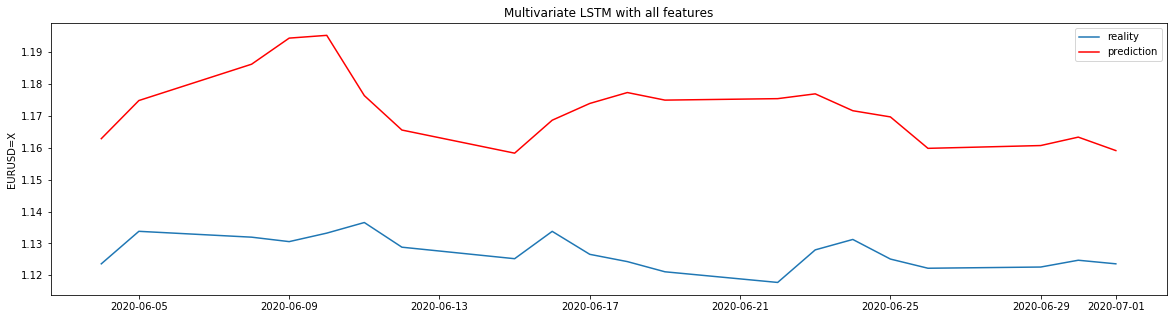

In [ ]:
#Conclusion: based on the visulization, volatility features do improve the model prediction accuracy
#I could say these indicators are efficiency

In [ ]:
#Question 5: Try to come up with a model which estimates the trade volume of people who track momentum factor.
# My idea is to 
#1.Find the period between the start and end of a trend
#2.Sum up the volume from the second green candle sticks to the second to last green candle sticks
#3.Use the value from step 2 to divide the whole volume in this trend and find the ratio
#4.Check whether this ratio is suitable for most stocks

In [26]:
#####TSLA#####
#Strong up trend before the stock spilt
TSLA = yf.download('TSLA', start='2020-08-12',end='2020-08-19')
TSLA

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-12,294.000000,317.000000,287.000000,310.951996,310.951996,109147000
2020-08-13,322.200012,330.235992,313.451996,324.200012,324.200012,102126500
2020-08-14,332.997986,333.760010,325.328003,330.141998,330.141998,62888000
2020-08-17,335.399994,369.171997,334.566010,367.127991,367.127991,101211500
2020-08-18,379.798004,384.779999,369.022003,377.417999,377.417999,82372500


In [27]:
Volume_ratio1 = (102126500+62888000+101211500)/sum(TSLA['Volume'])
Volume_ratio1

0.5816026591195326

In [28]:
TSLA = yf.download('TSLA', start='2020-08-25',end='2020-09-01')
TSLA

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-25,394.977997,405.589996,393.600006,404.667999,404.667999,53294500
2020-08-26,412.000000,433.200012,410.726013,430.634003,430.634003,71197000
2020-08-27,436.092010,459.119995,428.500000,447.750000,447.750000,118465000
2020-08-28,459.023987,463.697998,437.303986,442.679993,442.679993,100406000
2020-08-31,444.609985,500.140015,440.109985,498.320007,498.320007,118374400


In [29]:
Volume_ratio2 = (71197000+118465000+100406000)/sum(TSLA['Volume'])
Volume_ratio2

0.6282105675331557

In [30]:
#Strong up trend after annoucing enter s&p500
TSLA = yf.download('TSLA', start='2020-11-23',end='2020-11-30')
TSLA

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-23,503.500000,526.000000,501.790009,521.849976,521.849976,50260300
2020-11-24,540.400024,559.989990,526.200012,555.380005,555.380005,53648500
2020-11-25,550.059998,574.000000,545.369995,574.000000,574.000000,48930200
2020-11-27,581.159973,598.780029,578.450012,585.760010,585.760010,37561100


In [31]:
Volume_ratio3 = (53648500+48930200)/sum(TSLA['Volume'])
Volume_ratio3

0.5387533935118731

In [32]:
#Strong up trend after entering s&p500
TSLA = yf.download('TSLA', start='2020-12-29',end='2021-01-07')
TSLA

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-29,661.000000,669.900024,655.000000,665.989990,665.989990,22910800
2020-12-30,672.000000,696.599976,668.359985,694.780029,694.780029,42846000
2020-12-31,699.989990,718.719971,691.119995,705.669983,705.669983,49649900
2021-01-04,719.460022,744.489990,717.190002,729.770020,729.770020,48638200
2021-01-05,723.659973,740.840027,719.200012,735.109985,735.109985,32245200
2021-01-06,758.489990,774.000000,749.099976,755.979980,755.979980,44700000


In [33]:
Volume_ratio4 = (42846000+49649900+48638200+32245200)/sum(TSLA['Volume'])
Volume_ratio4

0.7194457365676017

In [35]:
average_volume_ratio_tsla = (Volume_ratio1+Volume_ratio2+Volume_ratio3+Volume_ratio4)/4
average_volume_ratio_tsla

0.6170030891830407

In [42]:
######AAPL####
#strong up trend before the split
AAPL = yf.download('AAPL', start='2020-07-31',end='2020-08-07').dropna()
AAPL

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-31,102.885002,106.415001,100.824997,106.260002,105.728088,374336800.0
2020-08-03,108.199997,111.637497,107.892502,108.937500,108.392181,308151200.0
2020-08-04,109.132500,110.790001,108.387497,109.665001,109.116043,173071600.0
2020-08-05,109.377502,110.392502,108.897499,110.062500,109.511551,121776800.0
2020-08-06,110.404999,114.412498,109.797501,113.902496,113.332329,202428800.0


In [44]:
a_Volume_ratio1 = (308151200.0+173071600.0+121776800.0)/sum(AAPL['Volume'])
a_Volume_ratio1

0.5111183140509654

In [45]:
AAPL = yf.download('AAPL', start='2020-08-18',end='2020-08-25')
AAPL

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-18,114.352501,116.000000,114.007500,115.562500,115.191338,105633600
2020-08-19,115.982498,117.162498,115.610001,115.707497,115.335869,145538000
2020-08-20,115.750000,118.392502,115.732498,118.275002,117.895126,126907200
2020-08-21,119.262497,124.867500,119.250000,124.370003,123.970551,338054800
2020-08-24,128.697495,128.785004,123.937500,125.857498,125.453270,345937600


In [46]:
a_Volume_ratio2 = (145538000+126907200+338054800)/sum(AAPL['Volume'])
a_Volume_ratio2

0.574820219209409

In [47]:
#earing surprise up trend
AAPL = yf.download('AAPL', start='2020-05-04',end='2020-05-12')
AAPL

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-04,72.292503,73.422501,71.580002,73.290001,72.726265,133568000
2020-05-05,73.764999,75.250000,73.614998,74.389999,73.817802,147751200
2020-05-06,75.114998,75.809998,74.717499,75.157501,74.579391,142333600
2020-05-07,75.805000,76.292503,75.492500,75.934998,75.350914,115215200
2020-05-08,76.410004,77.587502,76.072502,77.532501,77.144394,133838400
2020-05-11,77.025002,79.262497,76.809998,78.752502,78.358284,145946400


In [49]:
a_Volume_ratio3 = (147751200+142333600+115215200+133838400)/sum(AAPL['Volume'])
a_Volume_ratio3

0.6585678324193114

In [50]:
AAPL = yf.download('AAPL', start='2020-11-24',end='2020-12-03')
AAPL

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-24,113.910004,115.849998,112.589996,115.169998,114.998154,113874200
2020-11-25,115.550003,116.750000,115.169998,116.029999,115.856873,76499200
2020-11-27,116.570000,117.489998,116.220001,116.589996,116.416031,46691300
2020-11-30,116.970001,120.970001,116.809998,119.050003,118.872368,169410200
2020-12-01,121.010002,123.470001,120.010002,122.720001,122.536896,127728200
2020-12-02,122.019997,123.370003,120.889999,123.080002,122.896355,89004200


In [51]:
a_Volume_ratio4 = (76499200+46691300+169410200+127728200)/sum(AAPL['Volume'])
a_Volume_ratio4

0.6744608094289011

In [52]:
average_volume_ratio_aapl = (a_Volume_ratio1+a_Volume_ratio2+a_Volume_ratio3+a_Volume_ratio4)/4
average_volume_ratio_aapl

0.6256786970796223

In [ ]:
#Conclusion: we can find a model which estimates the trade volume of people who track momentum factor:
# The trade volume = 0.6 * Total Volume of the whole trend(from first green candlestick to the last candlestick) 